### Matrix multiplication as linear transformaion

#### The first way I learned

The method I learned to complete matrix multiplication was:

Given two matrices of shape $ 2x3 $ and $ 3x1 $ then the column count of the left matrix (3) must match the row count of the second (3). The resulting size of the matrix is the row count of the first (2) by the column count of the second (1), giving us a result with shape of 2x1.

The matrix that is produced by multiplying square matrices is itself a square.

Given square matrices M = $ \left[\begin{matrix} m_1 & m_2\\ m_3 & m_4 \end{matrix} \right] $, N = $ \left[\begin{matrix} n_1 & n_2\\ n_3 & n_4 \end{matrix} \right] $

$ \prod{M}{N} = \left[\begin{matrix}m_1 n_1 + m_2 n_3 & m_1 n_2 + m_2 n_4 \\ m_3 n_1 + m_4 n_3 & m_3 n_2 + m_4 n_4 \end{matrix}\right] $

The result here is confusing to look at. A simpler way to think about this is to designate the left matrix as the _Row Matrix (R)_ and the second matrix as the _Column Matrix (C)_. The matrix that will come out of this product is the _Product Matrix (P)_. We only need to know the P's size. Iterate through its cells noting each cell's row and column, and select the appropriate row from R and the appropriate column from C. The P cell's value is equal to the sum of pairwise multiplication between the row and column.

For example:

Given square matrices $ R = \left[\begin{matrix} 3 & 1\\ 2 & 4 \end{matrix} \right], C = \left[\begin{matrix} 5 & 8\\ 7 & 6 \end{matrix} \right] P = \left[\begin{matrix} p_{11} & p_{12}\\ p_{21} & p_{22} \end{matrix} \right] $

Then: 

$ p_{11} = \left[\begin{matrix} 3 & 1\end{matrix} \right] * \left[\begin{matrix} 5 \\ 7\end{matrix} \right] = 3*5 + 1*7 $

$ p_{12} = \left[\begin{matrix} 3 & 1\end{matrix} \right] * \left[\begin{matrix} 8 \\ 6\end{matrix} \right] = 3*8 + 1*6 $

$ p_{21} = \left[\begin{matrix} 2 & 4\end{matrix} \right] * \left[\begin{matrix} 5 \\ 7\end{matrix} \right] = 2*5 + 4*7 $

$ p_{22} = \left[\begin{matrix} 2 & 4\end{matrix} \right] * \left[\begin{matrix} 8 \\ 6\end{matrix} \right] = 2*8 + 4*6 $


### Another way

Thanks to [this](https://www.youtube.com/watch?v=XkY2DOUCWMU&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=4) handy video, we can use another method.

Let's rename the matrices we had:

$ M_2 = R, M_1 = C $,

$ M_2 = \left[\begin{matrix} 3 & 1\\ 2 & 4 \end{matrix} \right] , M_1 = \left[\begin{matrix} 5 & 8\\ 7 & 6 \end{matrix} \right] P = \left[\begin{matrix} p_{11} & p_{12}\\ p_{21} & p_{22} \end{matrix} \right] $

It's not a mistake that $ M_1 $ is second.

To find the product of $ M_2 * M_1 $, take a column from $ M_1 $, and for each cell, multiply its value as a scalar into the columns of $ M_2 $.

$ \left[\begin{matrix} p_{11} \\ p_{21} \end{matrix} \right] = 
\left[\begin{matrix} 3 & 1\\ 2 & 4 \end{matrix} \right] \left[\begin{matrix} 5 \\ 7 \end{matrix} \right] = 
5 \left[\begin{matrix} 3 \\ 2 \end{matrix} \right] + 7 \left[\begin{matrix} 1 \\ 4 \end{matrix} \right] =
\left[\begin{matrix} 22 \\ 38 \end{matrix} \right]
$ 

$ \left[\begin{matrix} p_{12} \\ p_{22} \end{matrix} \right] = 
\left[\begin{matrix} 3 & 1\\ 2 & 4 \end{matrix} \right] \left[\begin{matrix} 8 \\ 6 \end{matrix} \right] = 
8 \left[\begin{matrix} 3 \\ 2 \end{matrix} \right] + 6 \left[\begin{matrix} 1 \\ 4 \end{matrix} \right] =
\left[\begin{matrix} 30 \\ 40 \end{matrix} \right]
$ 

$ P = \left[\begin{matrix} 22 & 30 \\ 38 & 40 \end{matrix} \right] $


In [1]:
# Let's check the result
[3 1; 2 4] * [5 8; 7 6]

ans =

   22   30
   38   40



### This method makes sense if you can think of each matrix as a linear transformation. 

Given the standard basis for the linear space $ R^2 = \left[\begin{matrix} 1 & 0\\ 0 & 1 \end{matrix} \right] $ 

then we can label the first vector, or column, as $ \hat{i} = \left[\begin{matrix} 1 \\ 0 \end{matrix} \right] $

and the second vector, or column, as $ \hat{j} = \left[\begin{matrix} 0 \\ 1 \end{matrix} \right] $

$ \hat{i} $ is a vector of minimal length along the x axis and $ \hat{j} $ is a vector of minimal length along the y axis, such that applying scalars to both vectors would allow for a span of the entire space $ R^2 $.

In other words:

Let any other vector in this linear space in the form of $ (x,y) $ be described as a linear combination of the basis, where scalars $ \alpha, \beta \in the field R $

$ \exists (x,y) \in R^2: (x,y) = \alpha(\hat{i}) + \beta(\hat{j}) $

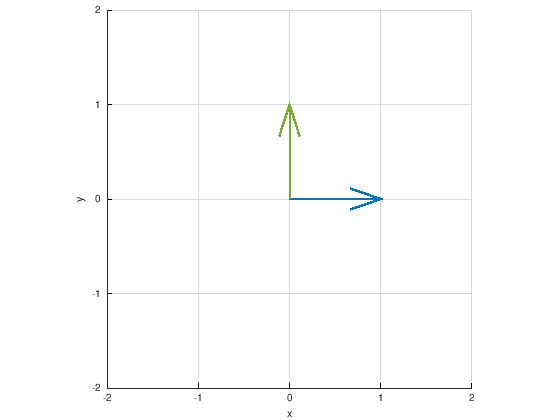

In [2]:
axis([-2 2 -2 2]);
xlabel("x");
ylabel("y");
axis("square");
grid on;
set(gca, "gridcolor", [0.85,0.85,0.85])
hold on;
draw_2d_vector([1, 0])
draw_2d_vector([0, 1])

Then, we can multiply the basis by $ M_1 $ to get a new basis, but since the standard basis we're starting with is an identity matrix then the result will be equal to the transformation itself. 

In [3]:
[1 0 ; 0 1] * [5 8 ; 7 6]

ans =

   5   8
   7   6



What's happened here is this: 

Let $ v_1 $ be the first vector/column of $ M_1 $.

$ v_1 $ represents a change of coordinates for $ \hat{i} $, which is a change to the linear space itself. The first component of $ v_1 $ is the scaling change for the $ x $ component of $ \hat{i} $, so that is applied as a scalar to the $ \hat{i} $ of the standard basis :

$ \hat{i} = 5 \left[\begin{matrix} 1 \\ 0 \end{matrix} \right] = \left[\begin{matrix} 5 \\ 0 \end{matrix} \right] $

The second component of $ v_1 $ represents a change for the $ y $ component of $ \hat{i} $. This $ y $ of $ \hat{i} $ is scaled by $ \hat{j} $, (although it is technically $ y $ that scales $ \hat{j} $, before we add it back into $ \hat{i}) $ :

$ \hat{j} = 7 \left[\begin{matrix} 0 \\ 1 \end{matrix} \right] = \left[\begin{matrix} 0 \\ 7 \end{matrix} \right] $

And then finally, the new vector for $ \hat{i} $: 

$ \left[\begin{matrix} 5 \\ 0 \end{matrix} \right] + \left[\begin{matrix} 0 \\ 7 \end{matrix} \right] = \left[\begin{matrix} 5 \\ 7 \end{matrix} \right] $


To say that $ \hat{i} $ has changed position on the x and y axes is to say that the linear space has changed.

basis =

          1          0
          0          1



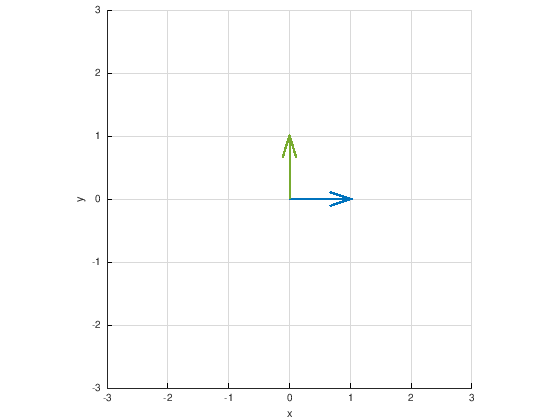

In [4]:
# As a demo, let's imagine we have the standard basis for a linear space:

format rat;

basis = [1 0; 0 1]

axis([-3 3 -3 3]);
xlabel("x");
ylabel("y");
axis("square");
grid on;
set(gca, "gridcolor", [0.85,0.85,0.85])
hold on;
draw_2d_vector(basis(:,1))
draw_2d_vector(basis(:,2))

transformation =

          3          1
          1         -2

basis_2 =

          3          1
          1         -2



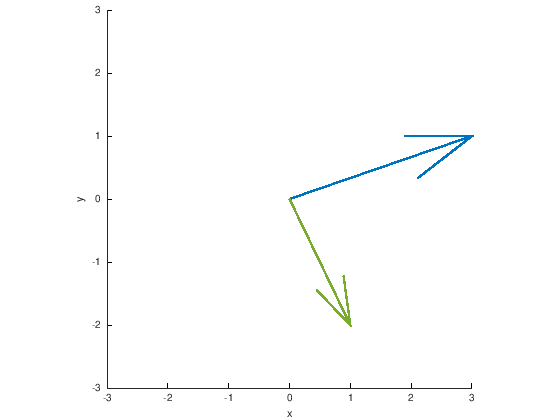

In [5]:
# And a transformation
# Imagine the arrows are taking parralel lines with them

transformation = [3 1; 1 -2]
basis_2 = transformation * basis

axis([-3 3 -3 3]);
xlabel("x");
ylabel("y");
axis("square");
set(gca, "gridcolor", [0.85,0.85,0.85])
hold on;
draw_2d_vector(basis_2(:,1))
draw_2d_vector(basis_2(:,2))

transformation_2 =

        1/4        1/2
          1       -1/2

basis_3 =

        5/4       -3/4
        5/2          2



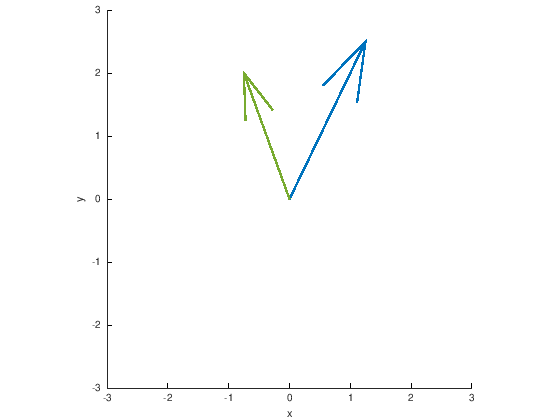

In [6]:
# And a transformation, notice it scales

transformation_2 = [1/4 1/2; 1 -1/2]
basis_3 = transformation_2 * basis_2

axis([-3 3 -3 3]);
xlabel("x");
ylabel("y");
axis("square");
set(gca, "gridcolor", [0.85,0.85,0.85])
hold on;
draw_2d_vector(basis_3(:,1))
draw_2d_vector(basis_3(:,2))